In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [21]:
import pandas as pd 
df=pd.read_csv("D:/GL/formations/gomycode/Titanic.csv")

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [24]:
def preprocess(data):
    data['Age'].fillna(data['Age'].mean(),inplace=True)
    data['Sex']=data['Sex'].map({'male':0,'female':1})
    data['Sex'].fillna(0.5,inplace=True)
    data['Embarked']=data['Embarked'].map({'C':0,'Q':1,'S':2})
    data['Embarked'].fillna(2,inplace=True)
    data['Fare'].fillna(data['Fare'].mean(),inplace=True)
    return data

In [30]:
data=preprocess(df)

In [31]:
x=data[['Sex','Pclass','Fare','Embarked']]
y=data['Survived']

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=40)

In [33]:
classifier=tree.DecisionTreeClassifier()
classifier.fit(x_train,y_train)
predicted=classifier.predict(x_test)
print('score{}'.format(classifier.score(x_train,y_train)))
print('recall', metrics.recall_score(predicted,y_test))
print('accuracy:',metrics.accuracy_score(predicted,y_test))

score0.8160112359550562
recall 0.7692307692307693
accuracy: 0.7318435754189944


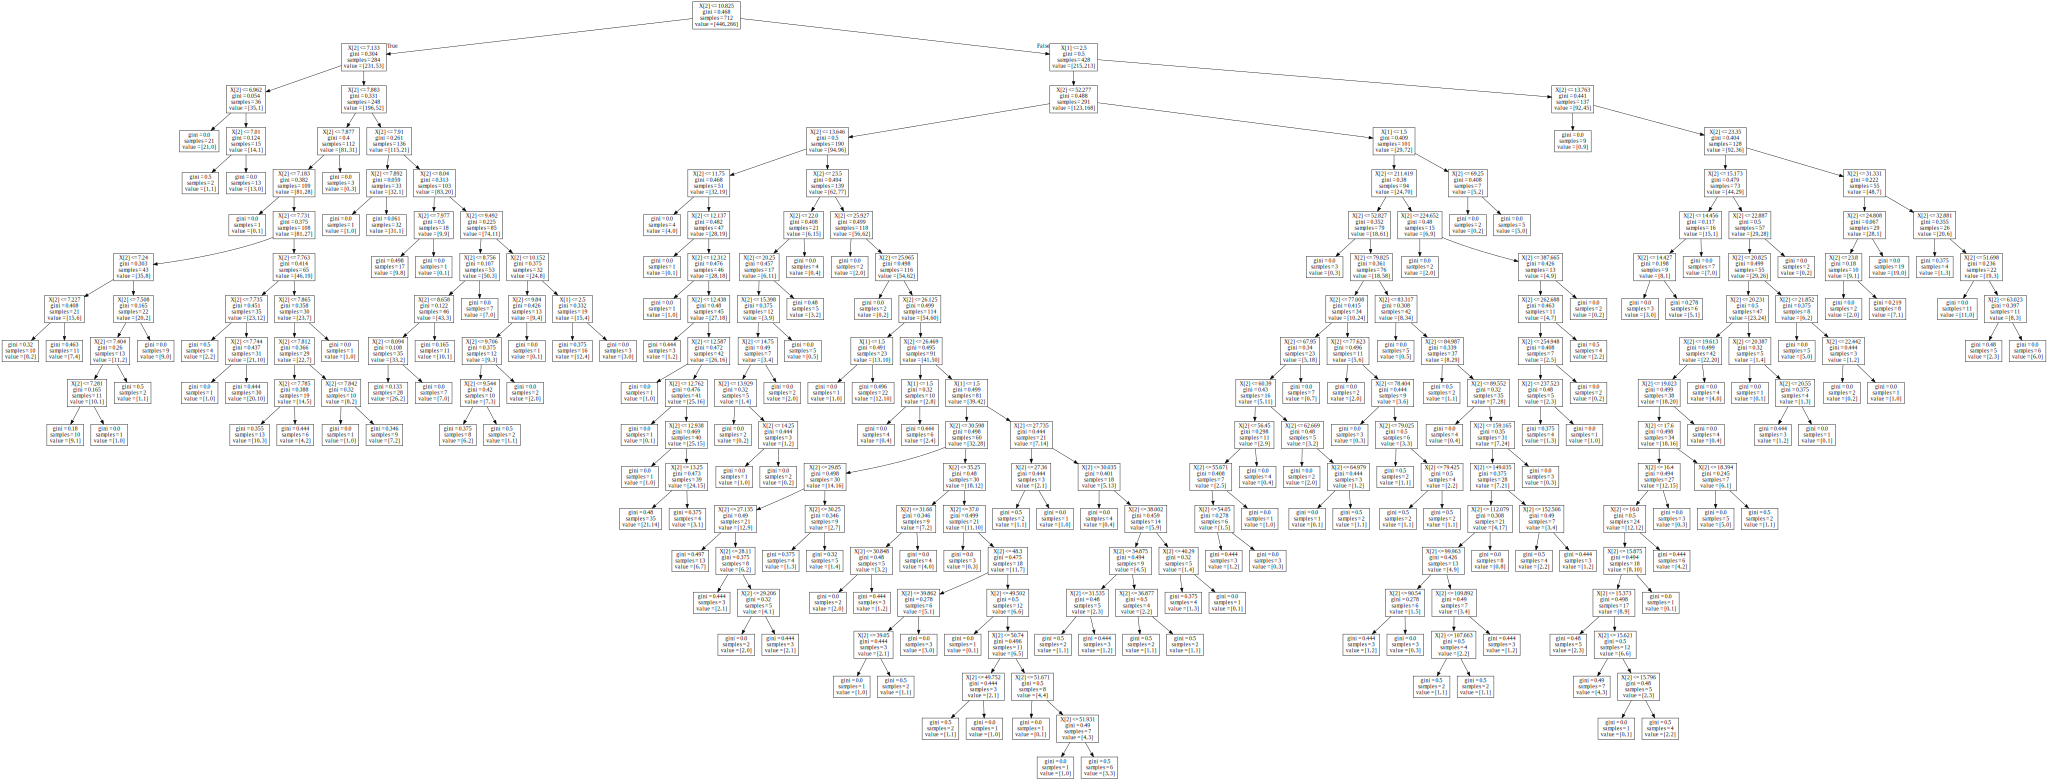

In [34]:
import graphviz
dot_data=tree.export_graphviz(classifier,out_file=None)
graph=graphviz.Source(dot_data)
graph.render("df")
graph

Use the render()-method to save the source code and render it with the default layout program (dot, see below for using other layout commands).

In [36]:
clf=DecisionTreeClassifier(max_depth=3,min_samples_leaf=1,max_features=4)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print('score{}'.format(clf.score(x_train,y_train)))
print('recall', metrics.recall_score(predicted,y_test))
print('accuracy:',metrics.accuracy_score(predicted,y_test))

score0.702247191011236
recall 0.7692307692307693
accuracy: 0.7318435754189944


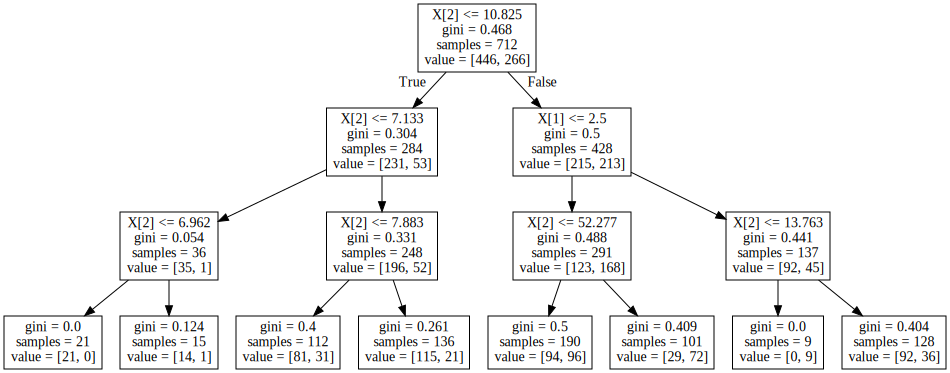

In [37]:
import graphviz
dot_data1=tree.export_graphviz(clf,out_file=None)
graph1=graphviz.Source(dot_data1)
graph1.render("data")
graph1

we can see that once we changed some of the decision tree parameters we got a better accuracy 


In [65]:
import operator
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
array=[]
for i in range(10,200):
    clf1=RandomForestClassifier(n_estimators=10)
    clf1.fit(x_train,y_train)
    y_pred=clf1.predict(x_test)
    array.append((i,metrics.accuracy_score(predicted,y_test)))
array.sort(key=operator.itemgetter(1))
print("the best n_estimator value is :",array[0][0],"with accuracy:",array[0][1])

the best n_estimator value is : 10 with accuracy: 0.7318435754189944
